# Predicting Sales Prices

 ## Dataset Attributes

 The dataset contains information about houses in Ames, Iowa. The data was collected by the Ames City Assessor’s Office describing 2930 property sales which occurred in Ames, Iowa between 2006 and 2010. The dataset, containing 81 variables, was compiled and published by De Cock in 2011.

 Some of the variables contained in the original dataset have been removed from the the dataset provided to you.
 The dataset provided to you contains the following variables:
* **Year_Built:** year that the house was originally constructed
* **Year_Remod_Add:** year that the house was last remodelled
* **Total_Bsmt_SF:** total size of basement area in square feet
* **First_Flr_SF:** size of the first floor in square feet
* **Second_Flr_SF:** size of the second floor in square feet
* **Gr_Liv_Area:** size of above grade, ground living area in square feet
* **Full_Bath:** number of full above grade bathrooms in the house
* **Half_Bath:** number of half above grade bathrooms in the house
* **Bedroom_AbvGr:** number of above grade bedrooms (does not include basement bedrooms)
* **Kitchen_AbvGr:** number of above grade kitchens
* **TotRms_AbvGrd:** total number of above grade rooms (does not include bathrooms)
* **Fireplaces:** number of fireplaces in the house
* **Garage_Area:** size of garage in square feet
* **Sale_Price:** sale price of the house in dollars


*De Cock, D. (2011). "Ames, Iowa: Alternative to the Boston Housing Data as an End of Semester
Regression Project," Journal of Statistics Education, Volume 19, Number 3.*

- https://ww2.amstat.org/publications/jse/v19n3/decock/DataDocumentation.txt
- http://ww2.amstat.org/publications/jse/v19n3/decock.pdf


 ## Objective

 The goal of this task is to analyse the relationship between these variables and build a multiple linear regression model to predict the sales prices based on the 'Gr_Liv_Area' and 'Garage_Area` variables.


In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
# Read in the data set
ames_df = pd.read_csv('ames.csv')

# Preview the data 
ames_df.head()

,Year_Built,Year_Remod_Add,Total_Bsmt_SF,First_Flr_SF,Second_Flr_SF,Gr_Liv_Area,Full_Bath,Half_Bath,Bedroom_AbvGr,Kitchen_AbvGr,TotRms_AbvGrd,Fireplaces,Garage_Area,Sale_Price
0,1960,1960,1080,1656,0,1656,1,0,3,1,7,2,528,215000
1,1961,1961,882,896,0,896,1,0,2,1,5,0,730,105000
2,1958,1958,1329,1329,0,1329,1,1,3,1,6,0,312,172000
3,1968,1968,2110,2110,0,2110,2,1,3,1,8,2,522,244000
4,1997,1998,928,928,701,1629,2,1,3,1,6,1,482,189900


In [3]:
# Number of unique values per variable 
ames_df.nunique(axis='rows')

Year_Built         118
Year_Remod_Add      61
Total_Bsmt_SF     1058
First_Flr_SF      1083
Second_Flr_SF      635
Gr_Liv_Area       1292
Full_Bath            5
Half_Bath            3
Bedroom_AbvGr        8
Kitchen_AbvGr        4
TotRms_AbvGrd       14
Fireplaces           5
Garage_Area        603
Sale_Price        1032
dtype: int64

In [4]:
# Clean and pre-process the data if neccessary 

# Info on ames_df
ames_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Year_Built      2930 non-null   int64
 1   Year_Remod_Add  2930 non-null   int64
 2   Total_Bsmt_SF   2930 non-null   int64
 3   First_Flr_SF    2930 non-null   int64
 4   Second_Flr_SF   2930 non-null   int64
 5   Gr_Liv_Area     2930 non-null   int64
 6   Full_Bath       2930 non-null   int64
 7   Half_Bath       2930 non-null   int64
 8   Bedroom_AbvGr   2930 non-null   int64
 9   Kitchen_AbvGr   2930 non-null   int64
 10  TotRms_AbvGrd   2930 non-null   int64
 11  Fireplaces      2930 non-null   int64
 12  Garage_Area     2930 non-null   int64
 13  Sale_Price      2930 non-null   int64
dtypes: int64(14)
memory usage: 320.6 KB


The information on ames_df suggests that there are no missing values.

In [5]:
# Confirmation of number of missing data values per column
missing_values_count = ames_df.isnull().sum() 
missing_values_count

Year_Built        0
Year_Remod_Add    0
Total_Bsmt_SF     0
First_Flr_SF      0
Second_Flr_SF     0
Gr_Liv_Area       0
Full_Bath         0
Half_Bath         0
Bedroom_AbvGr     0
Kitchen_AbvGr     0
TotRms_AbvGrd     0
Fireplaces        0
Garage_Area       0
Sale_Price        0
dtype: int64

There are no missing data values. 

In [6]:
# Remove any duplicates of rows 
ames_df.drop_duplicates()

,Year_Built,Year_Remod_Add,Total_Bsmt_SF,First_Flr_SF,Second_Flr_SF,Gr_Liv_Area,Full_Bath,Half_Bath,Bedroom_AbvGr,Kitchen_AbvGr,TotRms_AbvGrd,Fireplaces,Garage_Area,Sale_Price
0,1960,1960,1080,1656,0,1656,1,0,3,1,7,2,528,215000
1,1961,1961,882,896,0,896,1,0,2,1,5,0,730,105000
2,1958,1958,1329,1329,0,1329,1,1,3,1,6,0,312,172000
3,1968,1968,2110,2110,0,2110,2,1,3,1,8,2,522,244000
4,1997,1998,928,928,701,1629,2,1,3,1,6,1,482,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,1984,1984,1003,1003,0,1003,1,0,3,1,6,0,588,142500
2926,1983,1983,864,902,0,902,1,0,2,1,5,0,484,131000
2927,1992,1992,912,970,0,970,1,0,3,1,6,0,0,132000
2928,1974,1975,1389,1389,0,1389,1,0,2,1,6,1,418,170000


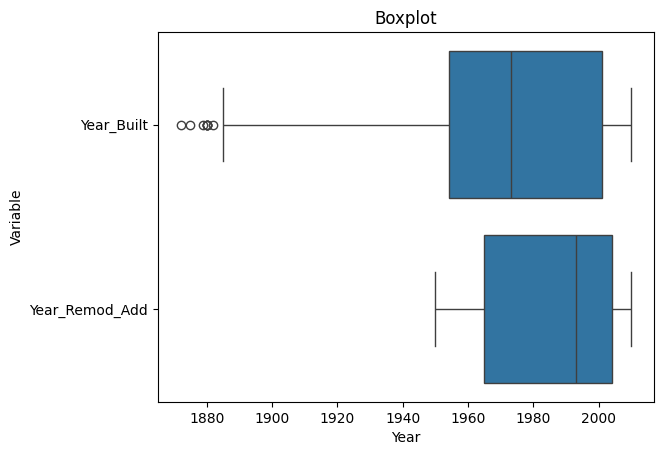

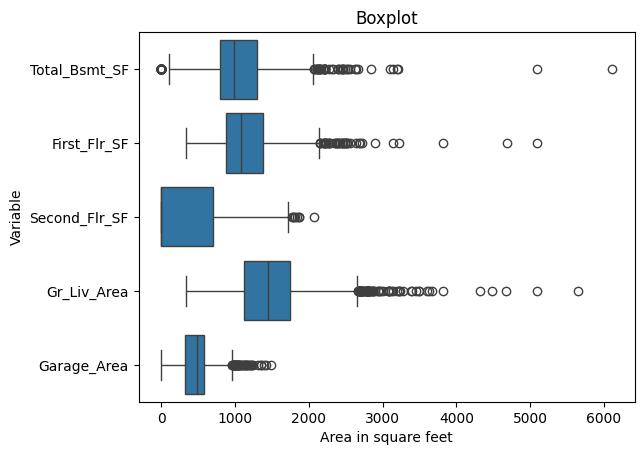

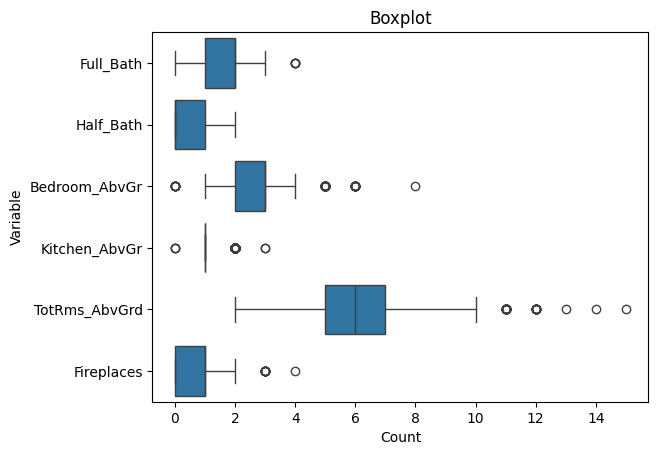

In [7]:
# Explore the data with visualisations such as histograms and correlation matrices

# Grouping features by units of measurement 
# Features that are in years
yr_features = ames_df.loc[:, ['Year_Built', 'Year_Remod_Add']]
yr_features.head()
yrs_melted = pd.melt(yr_features)
yrs_melted
sns.boxplot(data=yrs_melted, x='value', y='variable')
plt.title('Boxplot')
plt.xlabel('Year')
plt.ylabel('Variable')
plt.show()

# Features that are in square feet
area_features = ames_df.loc[:, ['Total_Bsmt_SF', 'First_Flr_SF', 'Second_Flr_SF', 'Gr_Liv_Area', 'Garage_Area' ]]
area_melted = pd.melt(area_features)
sns.boxplot(data=area_melted, x='value', y='variable')
plt.title('Boxplot')
plt.xlabel('Area in square feet')
plt.ylabel('Variable')
plt.show()

# Features that are tallies
tally_features = ames_df.loc[:, ['Full_Bath', 'Half_Bath', 'Bedroom_AbvGr', 'Kitchen_AbvGr', 'TotRms_AbvGrd', 'Fireplaces' ]]
tally_melted = pd.melt(tally_features)
sns.boxplot(data=tally_melted, x='value', y='variable')
plt.title('Boxplot')
plt.xlabel('Count')
plt.ylabel('Variable')
plt.show()

There are several potential outliers, most of which are in the size/area features. 

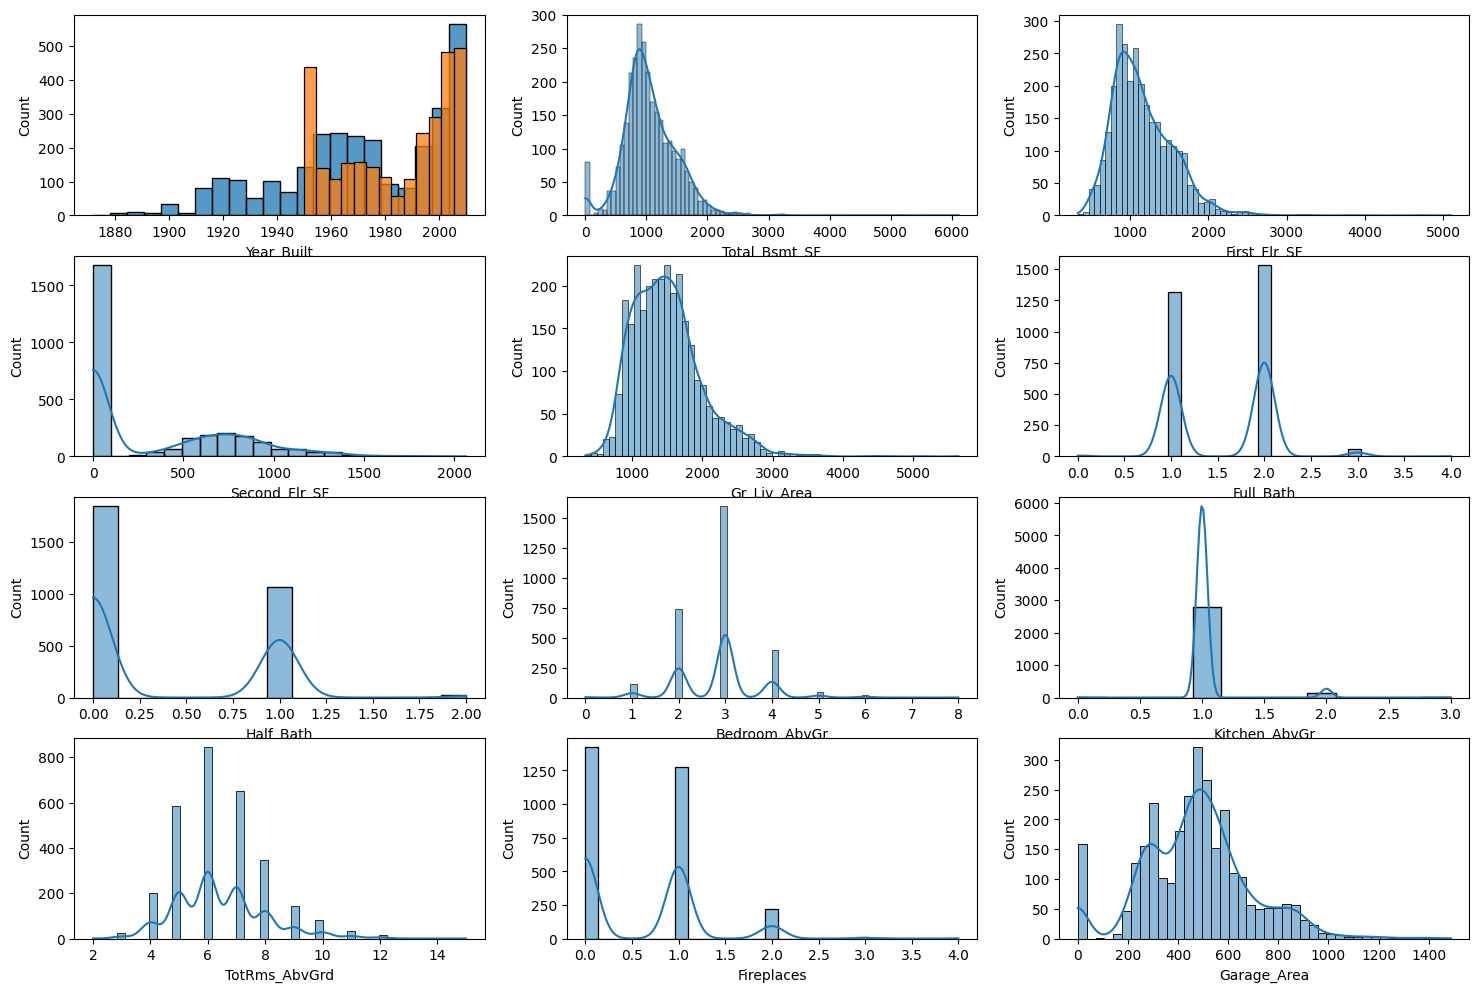

In [8]:
# Plot histogram of variables 
# Initialize axes 
fig, axs = plt.subplots(4,3, figsize=(18,12))

# Histograms of Independent variables
sns.histplot(data=ames_df, x='Year_Built', ax=axs[0,0],color='tab:blue', label='Year_Built' )
sns.histplot(data=ames_df, x='Year_Remod_Add', ax=axs[0,0], color='tab:orange', label='Year_Remod_Add')
sns.histplot(data=ames_df, x='Total_Bsmt_SF', ax=axs[0,1], kde=True)
sns.histplot(data=ames_df, x='First_Flr_SF', ax=axs[0,2], kde=True)
sns.histplot(data=ames_df, x='Second_Flr_SF', ax=axs[1,0], kde=True)
sns.histplot(data=ames_df, x='Gr_Liv_Area', ax=axs[1,1], kde=True)
sns.histplot(data=ames_df, x='Full_Bath', ax=axs[1,2], kde=True)
sns.histplot(data=ames_df, x='Half_Bath', ax=axs[2,0], kde=True)
sns.histplot(data=ames_df, x='Bedroom_AbvGr', ax=axs[2,1], kde=True)
sns.histplot(data=ames_df, x='Kitchen_AbvGr', ax=axs[2,2], kde=True)
sns.histplot(data=ames_df, x='TotRms_AbvGrd', ax=axs[3,0], kde=True)
sns.histplot(data=ames_df, x='Fireplaces', ax=axs[3,1], kde=True)
sns.histplot(data=ames_df, x='Garage_Area', ax=axs[3,2], kde=True)

plt.show()

Looking at the statistical distribution of the features, it looks like the features, follow a Gaussian distribution. In this case standardization is prefered as the scaling method, as the features follow a Gaussian distribution and the method is less sensitive to outliers.

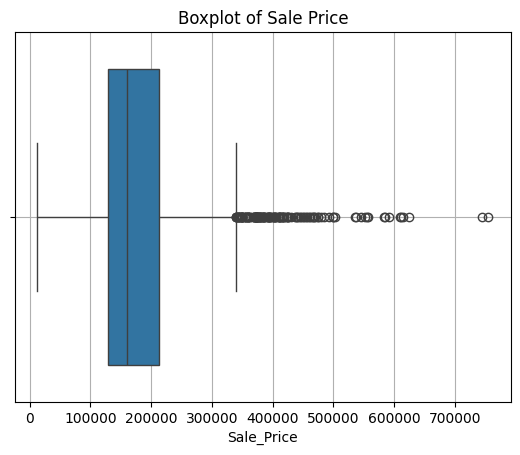

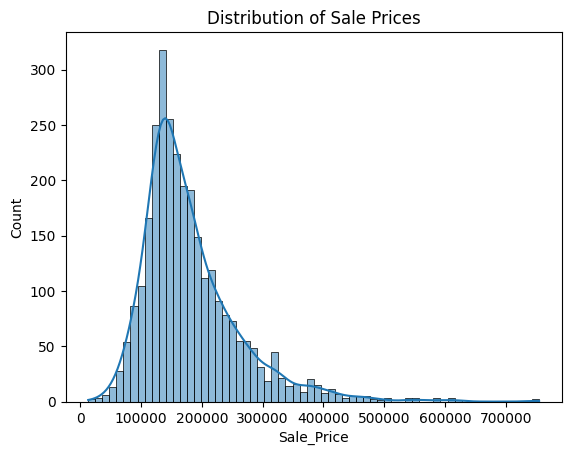

In [9]:
# Plot of dependent variable
# Boxplot of Sale_Price 
sns.boxplot(data=ames_df, x='Sale_Price')
plt.title('Boxplot of Sale Price')
plt.grid(True)
plt.show()

# Histogram of dependent variable
sns.histplot(data=ames_df, x='Sale_Price', kde=True)
plt.title('Distribution of Sale Prices')
plt.show()


From the boxplot and the histogram of the sale price we see that more than half of the sale prices fall between 120 000 dollars and 220 000 dollars. 

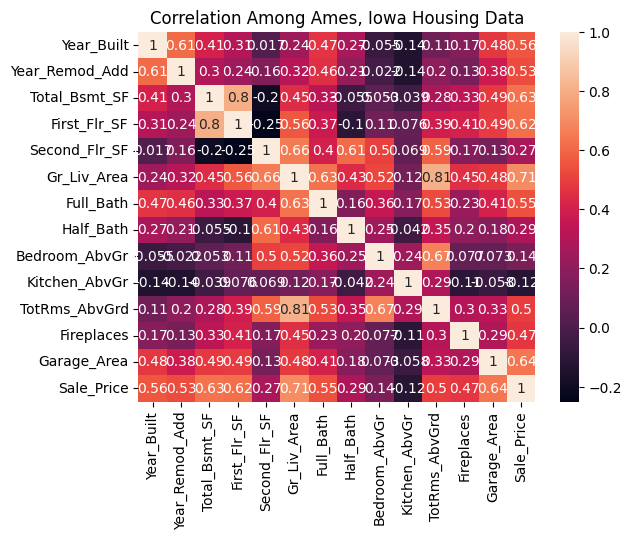

In [10]:
# Plot correlation matrix
plt.figure()
corr_coeff_mat = ames_df.corr()
sns.heatmap(corr_coeff_mat, annot=True)
plt.title('Correlation Among Ames, Iowa Housing Data')
plt.show()
plt.close()

The correlation heat map shows that all of the features have a positive correlation with the sale price. Therefore the sale prices increase as the features increase. THe sale price has the closest relationship with the  size of above grade, ground living area in square feet (Gr_Live_Area); size of garage in square feet (Garage_Area); total size of basement area in square feet (Total_Bsmt_SF); and size of the first floor in square feet (First_Flr_SF) . 
Consequently it makes sense to perform an analysis and create a linear regression model using Gr_Liv_Area and Garage_Area as independent variables. 

The correlation heat map also reveals a strong positive correlation between the size of above grade, ground living area in square feet and total number of above grade rooms excluding bathrooms. In addition there is strong positive correlation between the total size of basement area in square feet and the size of the first floor in square feet. 

In [11]:
# Split the independent variables from the dependent variable
# Select and reshape independent varaiables
X = ames_df.loc[:,['Gr_Liv_Area','Garage_Area']].values
X = X.reshape(-1,X.shape[1])

# Select and reshape the dependent variable
y = ames_df.loc[:,'Sale_Price'].values
y = y.reshape(-1,1)
y

array([[215000],
       [105000],
       [172000],
       ...,
       [132000],
       [170000],
       [188000]], dtype=int64)

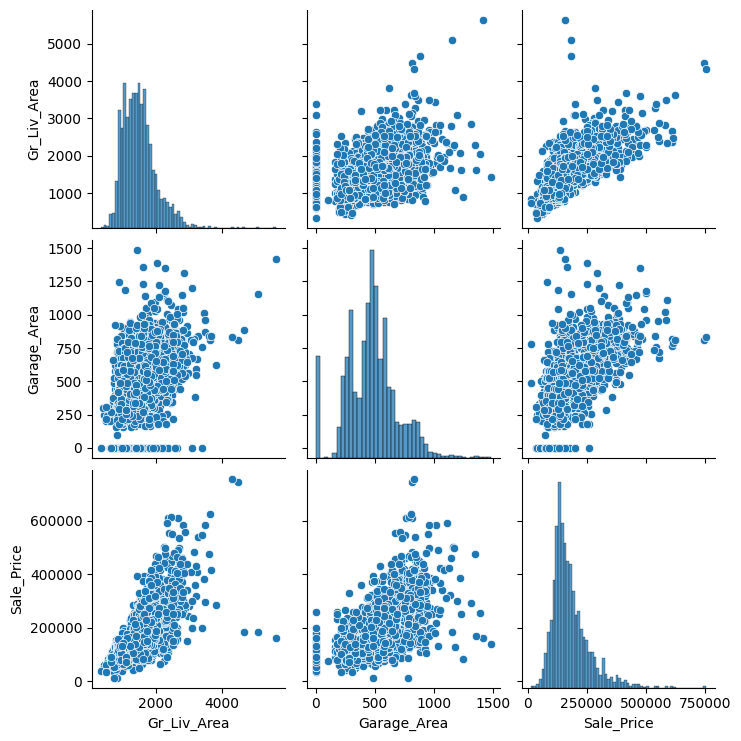

In [12]:
# Explore relationships between the independent and dependent variables
# Plot the distribution of the data
sns.pairplot(data= ames_df.loc[:,['Gr_Liv_Area','Garage_Area','Sale_Price']])

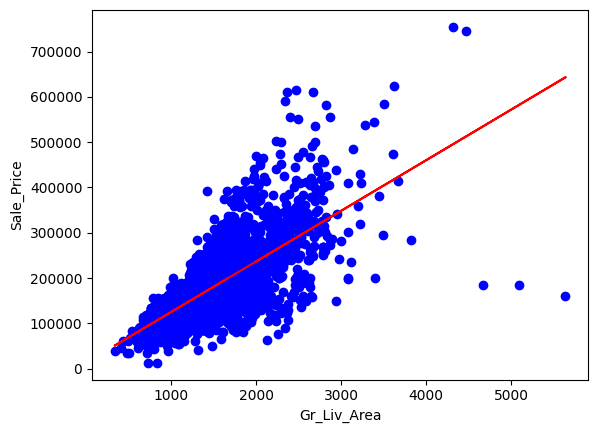

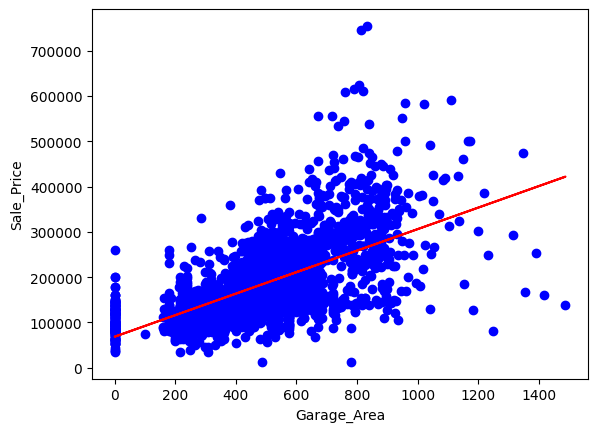

In [13]:
# Simple linear regression model 

# Relationship between Gr_Liv_Area and Sale_Price 
# Create empty linear regression model 
Gr_Liv_Area_model = LinearRegression()
# Create model using fit()
Gr_Liv_Area_model.fit(ames_df.loc[:,['Gr_Liv_Area']],y)
# Predictions
Gr_Liv_Area_pred = Gr_Liv_Area_model.predict(ames_df.loc[:,['Gr_Liv_Area']])
# Plot scatter with best fit line 
plt.scatter(ames_df.loc[:,['Gr_Liv_Area']],y,color = 'b')
plt.plot(ames_df.loc[:,['Gr_Liv_Area']],Gr_Liv_Area_pred,color = 'r') # Best fit line
plt.xlabel('Gr_Liv_Area')
plt.ylabel('Sale_Price')
plt.show()


# Relationship between Garage_Area and Sale_Price 
# Create empty linear regression model 
Garage_Area_model = LinearRegression()
# Create model using fit()
Garage_Area_model.fit(ames_df.loc[:,['Garage_Area']],y)
# Predictions
Garage_Area_pred = Garage_Area_model.predict(ames_df.loc[:,['Garage_Area']])
# Plot scatter with best fit line 
plt.scatter(ames_df.loc[:,['Garage_Area']],y,color = 'b')
plt.plot(ames_df.loc[:,['Garage_Area']],Garage_Area_pred,color = 'r') # Best fit line
plt.xlabel('Garage_Area')
plt.ylabel('Sale_Price')
plt.show()

Both the independent variables have a strong positive correlation with the sale price. 

In [14]:
# Create a training and test set with a 75:25 split ratio
# Random seed value
rseed = 12

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=rseed )

# Check that the split was successfully completed 
print ("Training data:",X_train.shape, y_train.shape)
print ("Test data:",X_test.shape, y_test.shape)

Training data: (2197, 2) (2197, 1)
Test data: (733, 2) (733, 1)


In [15]:
# Using StandardScaler() to scale the data 
# Creating an empty standardisation scalar
stdscX = StandardScaler()

# Fit the scaler on the training data 
stdscX.fit(X_train)

# Transform train and test data using the scalar
X_train = stdscX.transform(X_train)
X_test = stdscX.transform(X_test)

In [16]:
# Build a multiple linear regression model using 'Gr_Liv_Area' and 'Garage_Area'
# Create an empty linear regression model
lmodel = LinearRegression()

# Create the model using fit
lmodel.fit(X_train,y_train)

LinearRegression()

In [17]:
# Print the model intercept and coefficients 
print('Intercept: \n', lmodel.intercept_)
print('Coefficients: \n', lmodel.coef_)

Intercept: 
 [180478.50842057]
Coefficients: 
 [[39987.02475518 31363.87153939]]


In [18]:
# Generate predictions for the test set
y_pred = lmodel.predict(X_test)

In [19]:
# Evaluate the model 
# Mean squared error calculation 
mse = mean_squared_error(y_test, y_pred)

# Root mean squared error 
rmse = round(np.sqrt(mse),4)
print('RMSE:',rmse)

# R2 squared score
print ("R2 Score:", round (r2_score(y_test, y_pred), 4))


RMSE: 53427.8682
R2 Score: 0.6025


The root mean squared error (RMSE) is  52 427.87 dollars. If you consider that most sale prices fall between 100 000 dollars and 200 000 dollars the model is moderately okay at predicting the sale prices. If the sale price was predicted to be 100 000 dollars the true value could potentially be half of that. However if the sale price was predicted at 200 000 dollars the true value could be three quaters of the predicted value. 

The R-squared value further supports the fact that the model is moderatly good at predicted the true valule as the R-squared value is 0.6

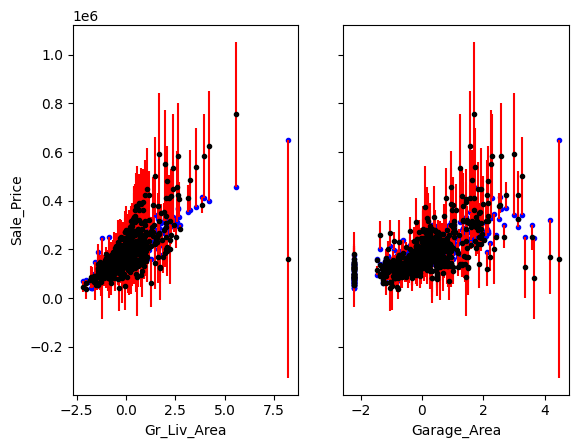

In [20]:
# Generate error plots
# Get values for error bars 
error_bar_values = np.abs((y_test-y_pred)[:,0]) 
Gr_Liv_Area_test = X_test[:,0]
Garage_Area_test = X_test[:,1]

# Initializing axes
fig, axs = plt.subplots(1,2, sharey= True)
axs[0].set_ylabel('Sale_Price')

# Error plot for Gr_Liv_Area column
axs[0].errorbar(Gr_Liv_Area_test, y_test[:, 0], yerr=error_bar_values, fmt='.k', ecolor='red', label='True value')
axs[0].scatter(x=Gr_Liv_Area_test,y=y_pred,c='b', marker='.', label='Predicted value')
axs[0].set_xlabel('Gr_Liv_Area')

# Error plot for Garage_Area column
axs[1].errorbar(Garage_Area_test, y_test[:, 0], yerr=error_bar_values, fmt='.k', ecolor='red', label='True value')
axs[1].scatter(x=Garage_Area_test,y=y_pred,c='b', marker='.', label='Predicted value')
axs[1].set_xlabel('Garage_Area')

plt.show()



In [21]:
coefficients = lmodel.coef_
coefficients.flatten()

array([39987.02475518, 31363.87153939])

In [22]:
# Print the coefficients 
print('Coefficients: \n')
print('Gr_Liv_Area:', coefficients[:,0])
print('Garage_Area:', coefficients[:,1] )

Coefficients: 

Gr_Liv_Area: [39987.02475518]
Garage_Area: [31363.87153939]


**Interpret coefficients in the context of the prediction:**
The dependent variable increases by coefficient for every single unit increase in the independent variable. 
Thus the sale price increases by 39987.02 dollars for every 1 square foot increase in the size of above grade, ground living area. 
Similarly the sale price increases by 31363.87 dollars for every 1 square foot increase in the garage area . 

**Summarise findings**
There are multiple features the influence the sale prices. The two features with the greatest influence are the garage area in square feet and the size of above grade, ground living area in square feet. 
The influence of the size of above grade, ground living area and the garage area is comparable, with the coefficients being 39987.02 dollars and 31363.87 dollars respectively. The data visualisation reveal that the larger the amount of sapce in the house the higher the sale price. 

The linear regression model that is created using the training set produces a 53427.8682 dollar root mean squared error and a 0.6025 r-squared score both indicators of moderate predicting performance. The shortcomming of the prediction model may be the result of the potential outliears.  